## LAB04 Assignment  

> 11912911 张子越

### 4.1 Before Assignment
#### 4.1.1 Load dataset & Import the required libraries
**Datasets**: scikit-learn provides a number of datasets which can be directly loaded by using a function. First we load a  dataset as an example.

In [1]:
import warnings
from sklearn import datasets
boston = datasets.load_boston()  # type: ignore
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

See [sklearn website](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) for details. To do this you have to import right packages and modules. 

#### 4.1.2 Preprocessing data
This is a small dataset containing 506 samples and 13 attributes. We need to use proper visualization methods to have an intuitive understanding. We choose the sixth attribute and draw a scattering plot to see the distribution of samples. We use *matplotlib* for data visualization.

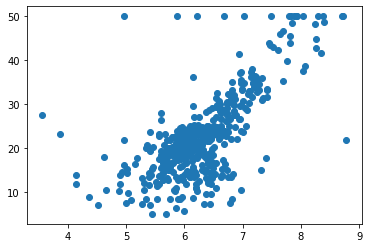

In [2]:
# Use one feature for visualization
x = boston.data[:,5]

# Get the target vector
y = boston.target

# Scattering plot of prive vs. room number
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.show()

It can be seen that the samples have some exceptional distributions at the top of the plot. They may be outliers owing to some practical operation during the data input (e.g., convert any price larger than 50 into 50). However, these data are harmful to the model training, and should be removed.

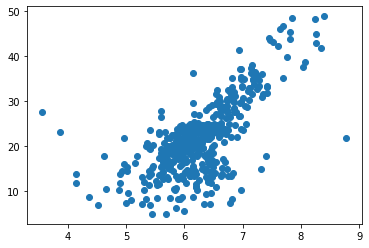

In [3]:
x = x[y<50.0]
y = y[y<50.0]

plt.scatter(x,y)
plt.show()

Now it can be seen that the data is nearly linear, although just in one dimension. Now we use X to denote all attributes

In [4]:
X = boston.data
y = boston.target

X = X[y<50.0]
y = y[y<50.0]

X.shape

(490, 13)

#### 4.1.3 Split data
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train.shape

(367,)

Usually we also use a validation set. When we use the test set for evaluation, the model will not be changed after the evaluation. However, sometime we want to optimize our model by changing its parameters according to prediction results. The solution is to split a validation set from the training set for adjusting our model. When we believe that the model is good enough, then we evaluate our model on the test set. A more rigorous and costly way is cross validation. With that method, the training set is divided into several pieces in the same size and take every piece as a validation set in turn.

#### 4.1.4 Training 
##### 1) Linear Regression
Now we try to implement a simple linear regression model because the dataset seems linear.

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

The model has been trained just by using a few lines of codes. Now let’s make a prediction for testing

In [7]:
# Make a prediction
y_0_hat = lin_reg.predict(X_test[0].reshape(1,-1))
y_0_hat

array([21.08481096])

In [8]:
y_test[0]

23.2

Notice that in scikit-learn, the standard interface for machine learning is
1) instantiate a learner with super parameters or none; 
2) use `fit()` method and feed the learner with training data; 
3) use `predict()` for prediction. 

Moreover, the data preprocessing algorithms also have the same interface, they just use `transform()` instead of `predict()`.

Below are the trained parameters.

In [9]:
lin_reg.coef_

array([-1.00353666e-01,  4.13334663e-02, -3.67263217e-02,  5.64996814e-01,
       -1.16969514e+01,  3.56207410e+00, -1.41182092e-02, -1.32362622e+00,
        2.53368045e-01, -1.36651483e-02, -7.81246156e-01,  7.12860459e-03,
       -4.19888835e-01])

In [10]:
lin_reg.intercept_

32.88234986123611

Use the evaluation method to see if it is a good model. The `score()` method uses R-square.

In [11]:
lin_reg.score(X_test, y_test)

0.7548807319952513

##### 2) Polynomial Regression
If you have understood the concept of linear regression, you can easily implement polynomial regression. 

#### 4.1.5 Evaluation model
Checking the results on test set。

### 4.2 LAB Assignment
Please use the real world dataset, **California housing price**, for model training and evaluate the model’s prediction performance. You can use simple linear regression, polynomial regression or more complicated base functions such as Gaussian function or use regularization methods. Make sure at least **20% data for testing** and choose one evaluation method you think good. **Please do not just train your model and say that is good enough, you need to give your analysis**. For that end, validation or cross validation is needed. Compare the score in the training set and the validation set. If they are both good enough, then use the model on the test set.

**Your test set can only be used for final evaluation!**

In [78]:
########### Write Your Code Here ###########
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

data = datasets.fetch_california_housing(as_frame=True)
print(data.DESCR)

df = data.data
df['target'] = data.target
df
############################################

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  target
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25   3.422

[5 rows x 9 columns]


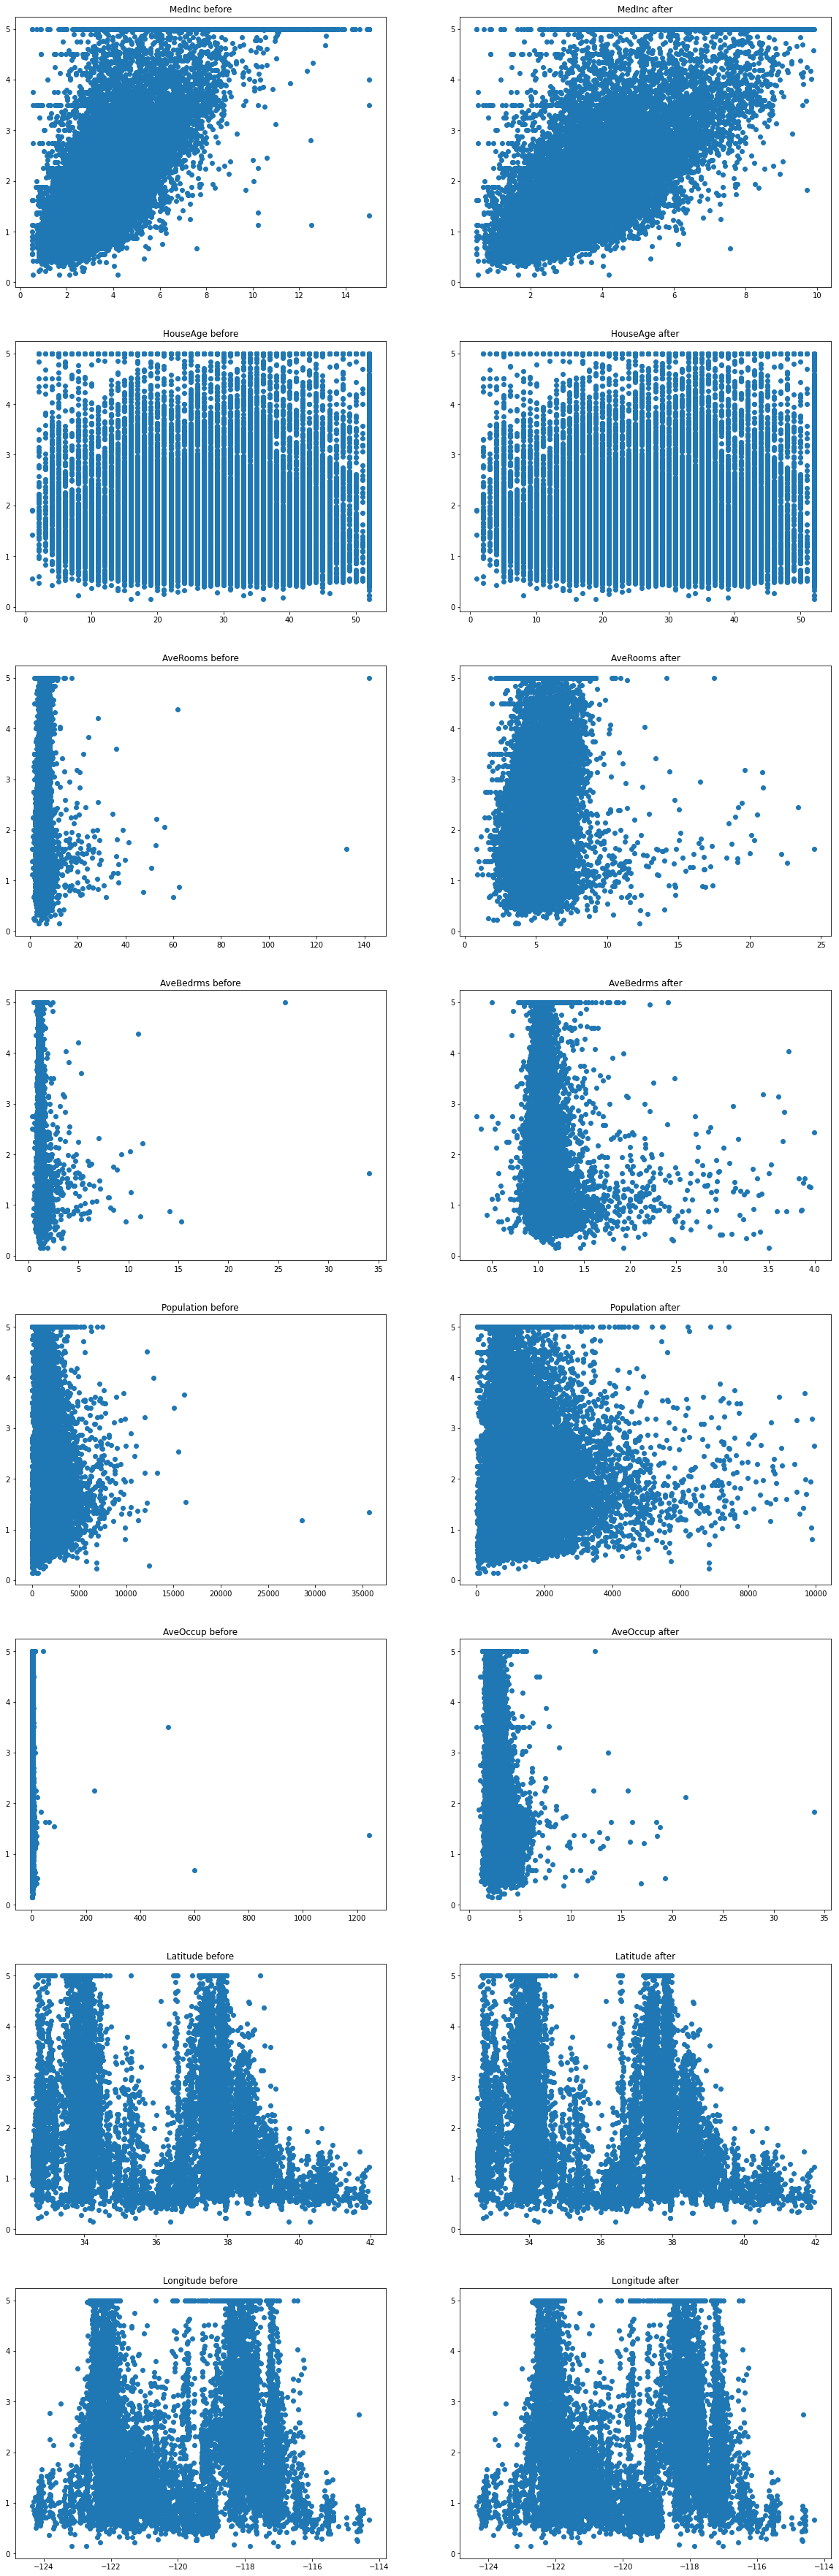

In [77]:
df1 = df[
    (df['MedInc']     < 10) &
    (df['HouseAge']   < 53) &
    (df['AveRooms']   < 25) &
    (df['AveBedrms']  < 4) &
    (df['Population'] < 10000) &
    (df['AveOccup']   < 40) &
    (df['Latitude']   < 45) &
    (df['Longitude']  < -114)
]
print(df1.head())

plt.figure(figsize=(20, 8*8))
for i in range(8):
    X = df.iloc[:, i]
    X_ = df1.iloc[:, i]

    plt.subplot(8, 2, 2*i+1).scatter(X, df['target'])
    plt.title(str(data.feature_names[i]) + ' before')
    plt.subplot(8, 2, 2*i+2).scatter(X_, df1['target'])
    plt.title(str(data.feature_names[i]) + ' after')
plt.show()

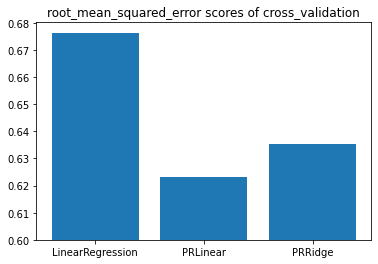

In [104]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1:]

score_means = []
labels = []

from sklearn.model_selection import train_test_split, cross_validate
X_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.linear_model import LinearRegression
scoring = 'neg_root_mean_squared_error'
clf = LinearRegression()
scores_LR = cross_validate(clf, X_train, y_train, scoring=scoring)
score_means.append(-np.mean(scores_LR['test_score']))
labels.append('LinearRegression')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

PR_linear = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scalar',StandardScaler()),
    ('lin_reg',LinearRegression())
])
clf = PR_linear
scores_PR = cross_validate(clf, X_train, y_train, scoring=scoring)
score_means.append(-np.mean(scores_PR['test_score']))
labels.append('PRLinear')

from sklearn.linear_model import Ridge
PR_ridge = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scalar',StandardScaler()),
    ('lin_reg',Ridge())
])
clf = PR_ridge
scores_PR = cross_validate(clf, X_train, y_train, scoring=scoring)
score_means.append(-np.mean(scores_PR['test_score']))
labels.append('PRRidge')

plt.title('root_mean_squared_error scores of cross_validation')
plt.bar(labels, [x-0.6 for x in score_means], bottom=0.6)
plt.show()
# PRLinear < PRRidge < LinearRegression

In [107]:
# apply on test data
from math import sqrt
def get_bias(y_pred, y) :
    return abs(float(y_pred.mean() - y.mean()))
def get_var (y_pred, y) :
    return sqrt(np.mean(np.square(y_pred - y)))

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred0 = LR.predict(X_test)
print(f'LinearRegression score={LR.score(X_test, y_test)}, bias={get_bias(y_pred0, y_test)}, var={get_var(y_pred0, y_test)}')

PR_linear.fit(X_train, y_train)
y_pred1 = PR_linear.predict(X_test)
print(f'PolynomialRegression score={PR_linear.score(X_test, y_test)}, bias={get_bias(y_pred1, y_test)}, var={get_var(y_pred1, y_test)}')

PR_ridge.fit(X_train, y_train)
y_pred2 = PR_ridge.predict(X_test)
print(f'LinearRegression score={PR_ridge.score(X_test, y_test)}, bias={get_bias(y_pred2, y_test)}, var={get_var(y_pred2, y_test)}')


LinearRegression score=0.6275806879221494, bias=0.0015971154307390378, var=0.6737368681224369
PolynomialRegression score=0.6988943427966148, bias=0.0020847579416027884, var=0.6058061448744091
LinearRegression score=0.6870051529980852, bias=0.0012165562610735314, var=0.617650518614294


### 4.3 Questions
1) Describe another real-world application where the regression method can be applied
2) What are the strengths of the linear/polynomial regression methods; when do they perform well?
3) What are the weaknesses of the linear/polynomial regression methods; when do they perform poorly?
4) What makes the linear regression method a good candidate for the regression problem, if you have enough knowledge about the data?

### 4.3 Aswers
1. Regression method can be used to predict weather, given conditions like temperature, moisture, etc. 
2. They are very efficient and can be trained in very short time. Performs well when we have numerous data, and the problem is linear. 
3. It can only solve linear questions, low accuracy in complex probelms. Performs porrly in non-linear data. 
4. It's efficiency, speed, and simplicity, when we have enough knowledge about the data. 